# Statistical Comparison: SGD vs GD (Sweep)

This notebook compares the performance of **Stochastic Gradient Descent (SGD)** and **Gradient Descent (GD)** on a neural network regression task.


In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy import stats
import wandb

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")

socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14e3edf50, raw_cell="import torch
import numpy as np
import matplotlib..." transformed_cell="import torch
import numpy as np
import matplotlib..." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W1sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


PyTorch version: 2.9.0
MPS available: True
Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 14e2afc40, execution_count=34 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14e3edf50, raw_cell="import torch
import numpy as np
import matplotlib..." transformed_cell="import torch
import numpy as np
import matplotlib..." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W1sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

## Create Challenge Dataset
DO NOT CHANGE THE CODE THAT CREATES THE DATA SET

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14f8593d0, raw_cell="# Define weird function
def weird_fun(x):
    retu.." transformed_cell="# Define weird function
def weird_fun(x):
    retu.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W3sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

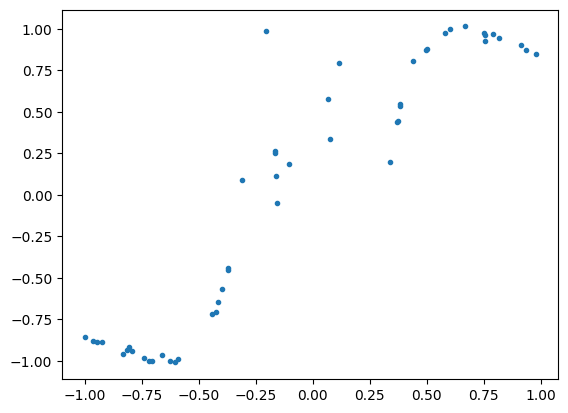

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 14f87c050, execution_count=35 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14f8593d0, raw_cell="# Define weird function
def weird_fun(x):
    retu.." transformed_cell="# Define weird function
def weird_fun(x):
    retu.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W3sZmlsZQ%3D%3D> result=[<matplotlib.lines.Line2D object at 0x14f944c20>]>,),kwargs {}:



BrokenPipeError: [Errno 32] Broken pipe

In [35]:
# Define weird function
def weird_fun(x):
    return np.sin(1 / x)


# Reset random seed
np.random.seed(1)

# Set data parameters
N = 50  # Number of observations
s = 0.02  # Noise standard deviation
N_test = 1000  # Number of test observations

# Create training set
x_train = np.sort(np.random.rand(N) * 2 - 1)
y_train = weird_fun(x_train) + s * np.random.randn(N)

# Create test set
x_test = np.sort(np.random.rand(N_test) * 2 - 1)
y_test = weird_fun(x_test) + s * np.random.randn(N_test)

# Plot training data
plt.plot(x_train, y_train, ".")

## Define hyperparameters

In [ ]:
# Here we set the hyperparameters, that both models will use
H = 64  # Hidden units
learning_rate = 0.001
activation = "Tanh" # We choose to use TanH as it will give a smoother curve
max_epochs = 10_000
num_layers = 3
batch_sizes = [1, 2, 5, 10, 25, None]
patience = 6000 # How many epochs of not improving before stopping

# Device to use for computations
device = torch.device("cpu") # As i am on macbook i will just use cpu

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14fa674d0, raw_cell="# Here we set the hyperparameters, that both model.." transformed_cell="# Here we set the hyperparameters, that both model.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W5sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 14fa76890, execution_count=36 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14fa674d0, raw_cell="# Here we set the hyperparameters, that both model.." transformed_cell="# Here we set the hyperparameters, that both model.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#W5sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

## Create models

In [37]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# Here i choose to create the model as a function so i easily can create two models
def create_model(H, num_layers, activation):
    activation_fn = getattr(torch.nn, activation)()

    layers = []
    layers.append(torch.nn.Linear(1, H))
    layers.append(activation_fn)

    for _ in range(num_layers - 1):
        layers.append(torch.nn.Linear(H, H))
        layers.append(activation_fn)

    layers.append(torch.nn.Linear(H, 1))

    model = torch.nn.Sequential(*layers)
    return model

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14bed1950, raw_cell="import torch.nn as nn
import torch.nn.functional a.." transformed_cell="import torch.nn as nn
import torch.nn.functional a.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X10sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 103e02660, execution_count=37 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14bed1950, raw_cell="import torch.nn as nn
import torch.nn.functional a.." transformed_cell="import torch.nn as nn
import torch.nn.functional a.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X10sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

## Train models

In [ ]:
def train(config=None):
    global run_counter

    wandb.init(config=config)
    batch_size = wandb.config.batch_size

    # This ensures the same results every time we run the sweep
    # Could be disable but i want same result for now
    seed = 42 + wandb.config.repeat

    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # create tensors
    x = torch.tensor(np.expand_dims(x_train, 1), dtype=torch.float32, device=device)
    y = torch.tensor(np.expand_dims(y_train, 1), dtype=torch.float32, device=device)
    x_test_t = torch.tensor(np.expand_dims(x_test, 1), dtype=torch.float32, device=device)
    y_test_t = torch.tensor(np.expand_dims(y_test, 1), dtype=torch.float32, device=device)

    n_samples = len(x)

    # default batch size
    if batch_size is None:
        batch_size = n_samples

    # create model
    model = create_model(H, num_layers, activation).to(device)
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # create dataloader
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=(batch_size < n_samples), # Only shuffle if we are using batch size smaller than dataset
        drop_last=False,
    )

    Loss_train = []
    Loss_test = []

    # Take one step to prevent sudden spike in loss
    xb0, yb0 = next(iter(loader))
    y_pred0 = model(xb0)
    loss0 = loss_fn(y_pred0, yb0)
    optimizer.zero_grad()
    loss0.backward()
    optimizer.step()

    best_loss = float("inf")
    best_epoch = 0

    start_time = time.time()

    for epoch in range(max_epochs):

        # training
        epoch_loss = 0.0
        for xb, yb in loader:
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(loader)
        Loss_train.append(avg_loss)

        # test
        with torch.no_grad():
            test_pred = model(x_test_t)
            test_loss = loss_fn(test_pred, y_test_t).item()
            Loss_test.append(test_loss)

            # log to W&B
            wandb.log(
                {
                    "epoch": epoch,
                    "train_loss": avg_loss,
                    "test_loss": test_loss,
                    "batch_size": batch_size,
                    "seed": seed,
                }
            )

        # check improvement
        if test_loss < best_loss:
            best_loss = test_loss
            best_epoch = epoch

        # early stopping
        if epoch - best_epoch >= patience:
            break

    computation_time = time.time() - start_time

    wandb.log(
        {
            "best_loss": best_loss,
            "epochs_to_converge": best_epoch + 1,
            "time_to_converge": computation_time,
        }
    )

    wandb.finish()

    return {
        "model": model,
        "train_loss": Loss_train,
        "test_loss": Loss_test,
        "final_train_loss": Loss_train[-1],
        "final_test_loss": Loss_test[-1],
        "epochs_to_converge": best_epoch + 1,
        "computation_time": computation_time,
    }

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14a58cf50, raw_cell="
def train(config=None):
    global run_counter

 .." transformed_cell="def train(config=None):
    global run_counter

  .." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X12sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 14fb81cc0, execution_count=38 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14a58cf50, raw_cell="
def train(config=None):
    global run_counter

 .." transformed_cell="def train(config=None):
    global run_counter

  .." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X12sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

## Run Sweep

In [39]:

sweep_config = {
    "method": "grid",
    "metric": {"name": "best_loss", "goal": "minimize"},
    "parameters": {
        "batch_size": {"values": batch_sizes},
        "repeat": {"values": list(range(10))},
    },
}

sweep_id = wandb.sweep(
    sweep_config,
    entity="peterdallhansen-danmarks-tekniske-universitet-dtu",
    project="dtu-sgd-gd-comparison",
)

wandb.agent(sweep_id, function=train, count=60)

socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 14b29a550, raw_cell="
sweep_config = {
    "method": "grid",
    "metri.." transformed_cell="sweep_config = {
    "method": "grid",
    "metric.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X22sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: f1vaobtm
Sweep URL: https://wandb.ai/peterdallhansen-danmarks-tekniske-universitet-dtu/dtu-sgd-gd-comparison/sweeps/f1vaobtm


socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
Exception in thread Thread-195 (_run_job):
Traceback (most recent call last):
  File "/Users/pdh/Documents/GitHub/DTU/Intelligente Systemer/Lab/4/.venv/lib/python3.14/site-packages/wandb/agents/pyagent.py", line 297, in _run_job
    self._function()
    ~~~~~~~~~~~~~~^^
  File "/var/folders/2j/ccmn5c917gq3drs77g3m7n_00000gn/T/ipykernel_46560/3354552943.py", line 68, in train
    test_pred = model(x_test_t)
  File "/Users/pdh/Documents/GitHub/DTU/Intelligente Systemer/Lab/4/.venv/lib/python3.14/site-packages/torch/nn/modules/module.py", line 1775, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/pdh/Documents/GitHub/DTU/Intelligente Systemer/Lab/4/.venv/lib/python3.14/site-packages/torch/nn/m

batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▂▂▂▃▄▅▆▆▆▇▇▇▇▇██████▇▇▇▇▇▇▆▆▆▅▅▅▅▄▃▃▃▃▂
time_to_converge,▁
train_loss,█▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25673
epoch,2014


wandb: Agent Starting Run: s3j593jn with config:
wandb: 	batch_size: 1
wandb: 	repeat: 2
wandb: 	batch_size: 1
wandb: 	repeat: 2


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▂▁▂▃▃▄▄▄▄▅▅▆▆▇████▇▇██▇▇▆▆▆▆▅▄▄▃▃▃▂▂▃▂▂
time_to_converge,▁
train_loss,█▅▅▅▅▄▄▄▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25707
epoch,2013


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Job received.
wandb: Agent Starting Run: 91wioku7 with config:
wandb: 	batch_size: 1
wandb: 	repeat: 3
wandb: Agent Starting Run: 91wioku7 with config:
wandb: 	batch_size: 1
wandb: 	repeat: 3


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time_to_converge,▁
train_loss,█▇▇▆▆▆▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25368
epoch,2010


wandb: Agent Starting Run: agia7jzx with config:
wandb: 	batch_size: 1
wandb: 	repeat: 4
wandb: 	batch_size: 1
wandb: 	repeat: 4


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▁▁▁
time_to_converge,▁
train_loss,█▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25513
epoch,2010


wandb: Agent Starting Run: tpv2uoei with config:
wandb: 	batch_size: 1
wandb: 	repeat: 5
wandb: 	batch_size: 1
wandb: 	repeat: 5


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▇▇▇▇█████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▂▂▃▂▃▃▃▂▃▄▄▅▅▅▅▅▅▆▅▅▅▅▅▅▅▄▄▃▃▂▂▂▂▁▁
time_to_converge,▁
train_loss,█▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25398
epoch,2011


wandb: Agent Starting Run: n6ehc6yc with config:
wandb: 	batch_size: 1
wandb: 	repeat: 6
wandb: 	batch_size: 1
wandb: 	repeat: 6


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▁▂▂▂▂▂▂▂▃▃▃▄▆▆▆▇▇██████████▇██▇▇▇▆▆▆▅▄
time_to_converge,▁
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.257
epoch,2018


wandb: Agent Starting Run: c3a5vkru with config:
wandb: 	batch_size: 1
wandb: 	repeat: 7
wandb: 	batch_size: 1
wandb: 	repeat: 7


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▃▂▂▂▃▃▄▄▅▅▆▆▇▇███▇█▇▇▆▆▆▅▄▄▄▄▄▃▃▃▂▂▂▂▁▁▁
time_to_converge,▁
train_loss,█▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,1
best_loss,0.25682
epoch,2012


wandb: Agent Starting Run: o28vrgpi with config:
wandb: 	batch_size: 1
wandb: 	repeat: 8
wandb: 	batch_size: 1
wandb: 	repeat: 8


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▂▂▃▃▃▃▃▃▃▃▄▅▅▅▆▆▆▇▇▇▇███████▇▆▆▆▅▄▄▃▂▁
time_to_converge,▁
train_loss,█████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁
batch_size,1
best_loss,0.26141
epoch,2015


wandb: Agent Starting Run: kv91jy18 with config:
wandb: 	batch_size: 1
wandb: 	repeat: 9
wandb: 	batch_size: 1
wandb: 	repeat: 9


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▂▃▄▃▄▄▄▄▅▅▅▄▅▅▅▅▆▆▆▇▇▇▇▇█████▇▇▇▇▇▆▆▆▆▅
time_to_converge,▁
train_loss,███▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▁▁▁
batch_size,1
best_loss,0.25558
epoch,2013


wandb: Agent Starting Run: oxiwcqey with config:
wandb: 	batch_size: 2
wandb: 	repeat: 0
wandb: 	batch_size: 2
wandb: 	repeat: 0


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇███
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃▂▃▃▃▃▃▃▃▃▃▃▃▃
time_to_converge,▁
train_loss,█▇▇▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
batch_size,2
best_loss,0.25607
epoch,2026


wandb: Agent Starting Run: r15f00db with config:
wandb: 	batch_size: 2
wandb: 	repeat: 1
wandb: 	batch_size: 2
wandb: 	repeat: 1


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇▇█
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▂▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▄▅▅▆▆▇▇▇▇▇▇▇▇████████
time_to_converge,▁
train_loss,███▇▇▇▇▇▇▆▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
batch_size,2
best_loss,0.25698
epoch,2023


wandb: Agent Starting Run: oob27kkd with config:
wandb: 	batch_size: 2
wandb: 	repeat: 2
wandb: 	batch_size: 2
wandb: 	repeat: 2


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇████████████
time_to_converge,▁
train_loss,█▇▇▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
batch_size,2
best_loss,0.25687
epoch,2023


wandb: Agent Starting Run: 2hhmiihn with config:
wandb: 	batch_size: 2
wandb: 	repeat: 3
wandb: 	batch_size: 2
wandb: 	repeat: 3


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▂▂▂▄▄▄▄▄▄▄▄▄▄▅▅▅▆▆▇▇▇▇▇███████████████
time_to_converge,▁
train_loss,██▇▇▇▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
batch_size,2
best_loss,0.25415
epoch,2021


wandb: Agent Starting Run: rvzx9lyh with config:
wandb: 	batch_size: 2
wandb: 	repeat: 4
wandb: 	batch_size: 2
wandb: 	repeat: 4


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▅▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
time_to_converge,▁
train_loss,█▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,2
best_loss,0.25776
epoch,2020


wandb: Agent Starting Run: 6e23099n with config:
wandb: 	batch_size: 2
wandb: 	repeat: 5
wandb: 	batch_size: 2
wandb: 	repeat: 5


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
time_to_converge,▁
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,2
best_loss,0.25577
epoch,2023


wandb: Agent Starting Run: opigltlu with config:
wandb: 	batch_size: 2
wandb: 	repeat: 6
wandb: 	batch_size: 2
wandb: 	repeat: 6


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅
time_to_converge,▁
train_loss,█▇▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
batch_size,2
best_loss,0.25675
epoch,2026


wandb: Agent Starting Run: 5lvxltn1 with config:
wandb: 	batch_size: 2
wandb: 	repeat: 7
wandb: 	batch_size: 2
wandb: 	repeat: 7


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▂▂▃▃▃▃▃▃▃▄▄▄▄▄▆▆▆▆▆▇▇▇▇▇█████████████▇▇
time_to_converge,▁
train_loss,█████▇▇▆▆▆▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
batch_size,2
best_loss,0.25837
epoch,2024


wandb: Agent Starting Run: n3y5tl7o with config:
wandb: 	batch_size: 2
wandb: 	repeat: 8
wandb: 	batch_size: 2
wandb: 	repeat: 8


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇███
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▅▁▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██████
time_to_converge,▁
train_loss,██▇▇▇▆▆▆▆▆▆▆▆▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁
batch_size,2
best_loss,0.26121
epoch,2023


wandb: Agent Starting Run: oq09qr02 with config:
wandb: 	batch_size: 2
wandb: 	repeat: 9
wandb: 	batch_size: 2
wandb: 	repeat: 9


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇██████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▅▆▆▆▆▇▇▇▇▇███████
time_to_converge,▁
train_loss,█▇▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
batch_size,2
best_loss,0.25506
epoch,2021


wandb: Agent Starting Run: xc04gout with config:
wandb: 	batch_size: 5
wandb: 	repeat: 0
wandb: 	batch_size: 5
wandb: 	repeat: 0


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▂▂▂▂▂▂▃▃▃▄▄▃▄▄▄▄▄▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇████
time_to_converge,▁
train_loss,█▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25654
epoch,2066


wandb: Agent Starting Run: cxysan40 with config:
wandb: 	batch_size: 5
wandb: 	repeat: 1
wandb: 	batch_size: 5
wandb: 	repeat: 1


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▅▆▆▆▆▆▇▇▇▇▇█████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▇▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃
time_to_converge,▁
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25726
epoch,2054


wandb: Agent Starting Run: 62vcqwrd with config:
wandb: 	batch_size: 5
wandb: 	repeat: 2
wandb: 	batch_size: 5
wandb: 	repeat: 2


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂
time_to_converge,▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25723
epoch,2060


wandb: Agent Starting Run: 1o3o4tzt with config:
wandb: 	batch_size: 5
wandb: 	repeat: 3
wandb: 	batch_size: 5
wandb: 	repeat: 3


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▇▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇███
time_to_converge,▁
train_loss,█▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25505
epoch,2056


wandb: Agent Starting Run: 44kcirfs with config:
wandb: 	batch_size: 5
wandb: 	repeat: 4
wandb: 	batch_size: 5
wandb: 	repeat: 4


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇█████
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂
time_to_converge,▁
train_loss,█▆▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25741
epoch,2054


wandb: Agent Starting Run: ja0z7woz with config:
wandb: 	batch_size: 5
wandb: 	repeat: 5
wandb: 	batch_size: 5
wandb: 	repeat: 5


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇█
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time_to_converge,▁
train_loss,█▅▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_size,5
best_loss,0.25585
epoch,2061


wandb: Agent Starting Run: qedfqz3b with config:
wandb: 	batch_size: 5
wandb: 	repeat: 6
wandb: 	batch_size: 5
wandb: 	repeat: 6


batch_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
epochs_to_converge,▁
seed,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▄▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇██
time_to_converge,▁
train_loss,█▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
batch_size,5
best_loss,0.25632
epoch,2070


wandb: Ctrl + C detected. Stopping sweep.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.
socket.send() raised exception.


Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x14d1d95b0>> (for post_run_cell), with arguments args (<ExecutionResult object at 14b34d400, execution_count=39 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 14b29a550, raw_cell="
sweep_config = {
    "method": "grid",
    "metri.." transformed_cell="sweep_config = {
    "method": "grid",
    "metric.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/pdh/Documents/GitHub/DTU/Intelligente%20Systemer/Lab/4/lab%20sweep.ipynb#X22sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
# Number of runs
n_trials = 10

gd_results = []
sgd_results = []

for trial in range(n_trials):
    print(f"\nTrial {trial + 1}/{n_trials}")

    torch.manual_seed(42 + trial)
    np.random.seed(42 + trial)

    # Train with GD
    print("  Training with GD...")
    gd_result = train(
        x_train,
        y_train,
        x_test,
        y_test,
        H,
        learning_rate,
        num_layers,
        activation,
        max_epochs,
        device,
        batch_size=None,
    )
    gd_results.append(gd_result)

    # Reset random seed again for fair comparison
    torch.manual_seed(42 + trial)
    np.random.seed(42 + trial)

    # Train with SGD
    print("  Training with SGD...")
    sgd_result = train(
        x_train,
        y_train,
        x_test,
        y_test,
        H,
        learning_rate,
        num_layers,
        activation,
        max_epochs,
        device,
        batch_size=batch_size,
    )
    sgd_results.append(sgd_result)

    print(f"  GD  - Final Test Loss: {gd_result['final_test_loss']:.6f}")
    print(f"  SGD - Final Test Loss: {sgd_result['final_test_loss']:.6f}")

## Statistical Analysis

In [ ]:
gd_final_test = [r["final_test_loss"] for r in gd_results]
sgd_final_test = [r["final_test_loss"] for r in sgd_results]

gd_times = [r["computation_time"] for r in gd_results]
sgd_times = [r["computation_time"] for r in sgd_results]

# Mean test loss
gd_mean_loss = np.mean(gd_final_test)
sgd_mean_loss = np.mean(sgd_final_test)

print("Mean Test Loss:")
print(f"  GD:  {gd_mean_loss:.6f}")
print(f"  SGD: {sgd_mean_loss:.6f}")


def ci_95(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    return stats.t.interval(0.95, df=len(data) - 1, loc=mean, scale=sem)

# 95% confidence intervals for test loss
gd_ci_low, gd_ci_high = ci_95(gd_final_test)
sgd_ci_low, sgd_ci_high = ci_95(sgd_final_test)

print("\n95% Confidence Interval (Test Loss):")
print(f"  GD:  [{gd_ci_low:.6f}, {gd_ci_high:.6f}]")
print(f"  SGD: [{sgd_ci_low:.6f}, {sgd_ci_high:.6f}]")


# Mean computation time
gd_mean_time = np.mean(gd_times)
sgd_mean_time = np.mean(sgd_times)

print("\nMean Computation Time:")
print(f"  GD:  {gd_mean_time:.3f} seconds")
print(f"  SGD: {sgd_mean_time:.3f} seconds")

## Visualize results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract test losses across trials
gd = np.array([r["test_loss"] for r in gd_results])
sgd = np.array([r["test_loss"] for r in sgd_results])
epochs = np.arange(gd.shape[1])


def mean_ci(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=1)
    se = std / np.sqrt(data.shape[0])
    ci95 = 1.96 * se
    return mean, ci95


gd_mean, gd_ci = mean_ci(gd)
sgd_mean, sgd_ci = mean_ci(sgd)


# Downsample for plotting (keeps clarity)
idx = np.linspace(0, len(epochs) - 1, 400).astype(int)

# PGFPlots colors
COLOR_GD = "#1f77b4"
COLOR_SGD = "#ff7f0e"

plt.rcParams.update(
    {
        "font.family": "serif",
        "mathtext.fontset": "cm",
        "axes.edgecolor": "black",
        "axes.linewidth": 0.8,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "grid.color": "gray",
        "grid.linewidth": 0.5,
        "grid.alpha": 0.3,
        "legend.frameon": True,
        "legend.edgecolor": "black",
        "legend.fancybox": False,
    }
)

fig, ax = plt.subplots(figsize=(9, 4.8))

# Shaded CI regions
ax.fill_between(
    epochs[idx],
    gd_mean[idx] - gd_ci[idx],
    gd_mean[idx] + gd_ci[idx],
    color=COLOR_GD,
    alpha=0.15,
)
ax.fill_between(
    epochs[idx],
    sgd_mean[idx] - sgd_ci[idx],
    sgd_mean[idx] + sgd_ci[idx],
    color=COLOR_SGD,
    alpha=0.15,
)

# Mean curves
ax.plot(
    epochs[idx], gd_mean[idx], color=COLOR_GD, linewidth=2, label="GD Mean ± 95% CI"
)
ax.plot(
    epochs[idx],
    sgd_mean[idx],
    color=COLOR_SGD,
    linewidth=2,
    label="SGD Mean ± 95% CI",
)

# Labels and title
ax.set_xlabel("Epoch")
ax.set_ylabel("Test Loss")
ax.set_title("Mean Test Loss over Epochs (with 95% CI)", fontsize=16)

# Move legend below title
ax.legend(loc="upper center", ncol=2, frameon=True)

ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()